<h1><center>Boston House Prices</center></h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Boston_-_panoramio_%2823%29.jpg" style="width: 750px;"/>

   ## Introduction

The aim of this project is to analyse the Boston house prices dataset from the UCI Machine Learning Repository, by firstly using descriptive statistics and plots to describe the Boston House Prices, secondly using inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t and lastly to create a neural network that can predict the median house price based on the other variables in the dataset.

The Boston house price dataset consists of house prices from various parts of Boston. These house prices are based on variables including information on Crime (CRIM), average number of rooms per dwelling (RM), proportion of owner-occupied units built prior to 1940 (AGE), neighbourhoods with more lower-class workers (LSTAT) and there are other variables which can be seen below. This data was collected in 1978 and consists of only 506 cases.

### DATA

Import the libraries required to complete this project, using sklearn and display the shape and the features of this dataset.

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import keras as kr
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import tensorflow as tf
import scipy.stats as stats

# Magic line in plt
%matplotlib inline

# Load dataset
boston = load_boston()

# Print the no. of rows and columns
print("Shape of the dataset:", boston.data.shape) 

# Print the description of the dataset
print("\n", boston.DESCR) 

Using TensorFlow backend.


Shape of the dataset: (506, 13)

 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate

## 1.  Descriptive Statistics

A descriptive statistic is a summary statistic that quantitatively describes or summarizes features of a collection of information, while descriptive statistics is the process of using and analysing those statistics [1]. In this part one, we are going to create a dataframe from the Boston dataset converting it from a nd-array. This will allow us to easily extract and describe parts of this dataset. We are going to create plots for all the dataset and also plot the correlation between different variables. 

In [3]:
# Converting data from nd-array to pandas dataframe, re-naming column names & Price Column
data = pd.DataFrame(boston.data) 
data.columns = boston.feature_names 
data['PRICE'] = boston.target

# Print the first 5 rows of the dataset with four decimal places
data.head(5).round(4) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.0063,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0690,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Run a summary statistics rounding to four deciaml place
data.describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.6135,8.6015,0.0063,0.0820,0.2565,3.6771,88.9762
ZN,506.0,11.3636,23.3225,0.0000,0.0000,0.0000,12.5000,100.0000
INDUS,506.0,11.1368,6.8604,0.4600,5.1900,9.6900,18.1000,27.7400
CHAS,506.0,0.0692,0.2540,0.0000,0.0000,0.0000,0.0000,1.0000
NOX,506.0,0.5547,0.1159,0.3850,0.4490,0.5380,0.6240,0.8710
RM,506.0,6.2846,0.7026,3.5610,5.8855,6.2085,6.6235,8.7800
AGE,506.0,68.5749,28.1489,2.9000,45.0250,77.5000,94.0750,100.0000
DIS,506.0,3.7950,2.1057,1.1296,2.1002,3.2074,5.1884,12.1265
RAD,506.0,9.5494,8.7073,1.0000,4.0000,5.0000,24.0000,24.0000
TAX,506.0,408.2372,168.5371,187.0000,279.0000,330.0000,666.0000,711.0000


The above function provides percentile’s and other key statistics. We can see that the average house price in 1978 was \\$22,500 while min value was \\$5,000 with max value of \\$50,000 while standard deviation is \\$9,197. We can also infer that the max number of rooms per dwelling is 8.78 while the min is 3.56 and mean of 6.2. This is just a few examples of the above variables.

Next let's visualise the house prices dataset plotting a histogram to see the frequency and values of each variable.

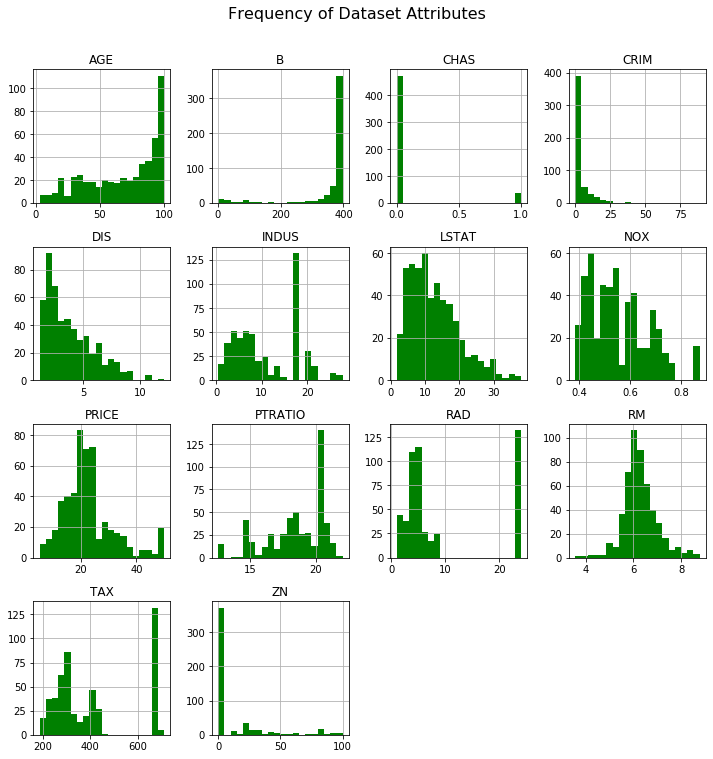

In [5]:
# Create a histogram
data.hist(bins=20,figsize=(10,10),grid=True, color='g')

# Title of Histogram
plt.suptitle('Frequency of Dataset Attributes', y=1.05, size=16)
plt.tight_layout()

The above plots a histogram for all variable and also includes price. It shows the frequency of the values that appear in the dataset. For example, if we look at that attribute CHAS (Charles River dummy variable), we can see that there are two values 0 and 1 with the number of properties over 400 not tracking near the river and under 50 tracking near the property. 

Both PRICE and RM have the closet relationship to normal distribution. AGE has a positive skewness; this indicates that mean and median will be greater than the mode while LSTAT has negative skewness indicating the mean and median will be less than the mode. For TAX, we find a large amount of the distribution is around 700.

Now, let’s look at the variation in the values of various variables present in the dataset. This is achieved by plotting a boxplot of all the variables

Text(0.5, 1.05, 'Variation of Variables')

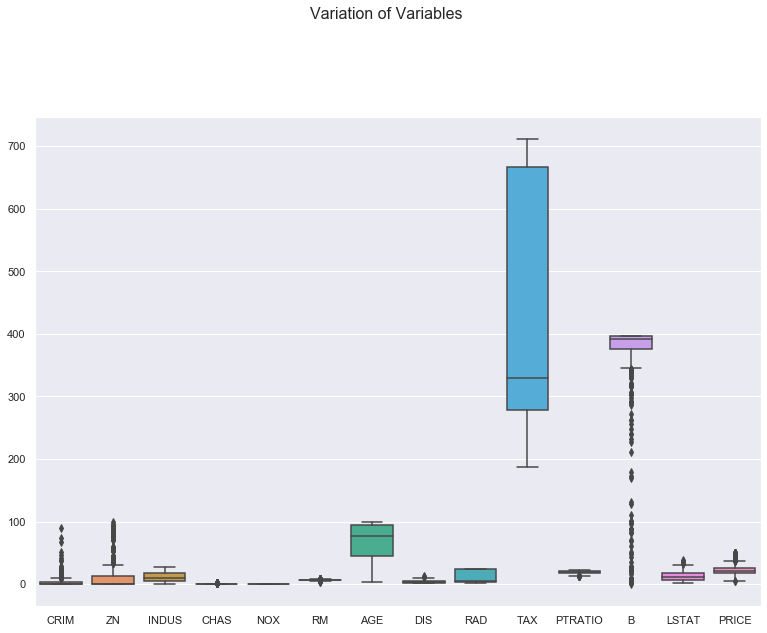

In [6]:
# Re-size the displot
sns.set(rc={'figure.figsize':(13,9)})

# Create a boxplot
sns.boxplot(data=data)

# Add title
plt.suptitle('Variation of Variables', y=1.05, size=16)

We can see from our boxplot, there are a number of outliners in variables 'CRIM', 'ZN' and 'B'. These may might reduce the regression model's precision if used so these variables will be omitted. Tax has the highest value in this dataset. 

Let's create a displot to visualise the price of our property.

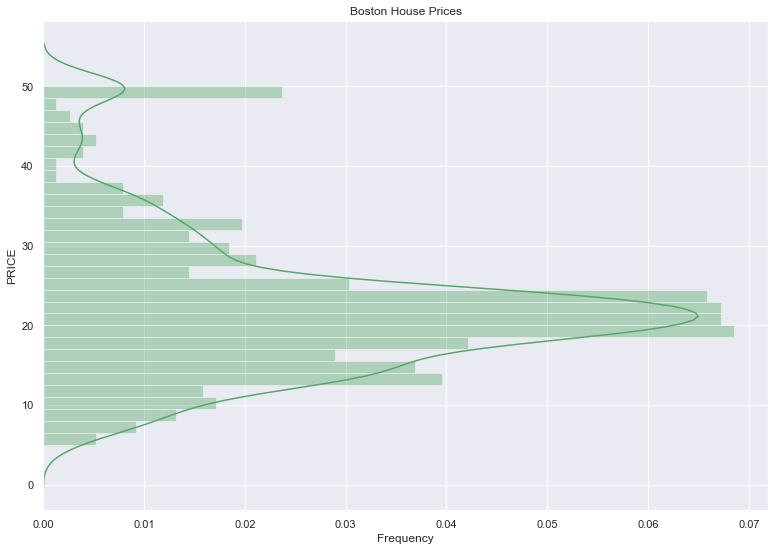

In [7]:
# Use seaborn to create a plot
# Use color codes to change color
sns.set_color_codes()

# Re-size the displot
sns.set(rc={'figure.figsize':(13,9)})

# Create a displot to show the 'Price'
sns.distplot(data['PRICE'], bins=30, vertical=True, color="g")

#Title
plt.title("Boston House Prices")       

# X -axis description
plt.xlabel("Frequency")

#Print plot
plt.show()

As we can see from the plot above, the majority of the property prices are between the \\$15000 and the \\$25,000 mark which was indicated from the above table with the mean at \\$22,500 while there are a few outliners in the min and max value. 

Next shows the skewness and kurtosis based on the price of the houses.

In [8]:
# show skewness and kurtosis
print("Skewness: %.2f" % data['PRICE'].skew())
print("Kurtosis: %.2f" % data['PRICE'].kurt())

Skewness: 1.11
Kurtosis: 1.50


The main difference between skewness and kurtosis is that the former talks of the degree of symmetry, whereas the latter talks of the degree of peakedness, in the frequency distribution [2]. As the price is above 1, the data is positively highly skewed. Positive Skewness means when the tail on the right side of the distribution is longer or fatter. This indicates that the mean and median will be greater than the mode [3].

The krutosis is 1.50. This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic [3].

Let's use a pairplot to visualise the relationship between two variables. We will only select a number of variables which we think have the biggest correlation of price. Later on, we will create a correlation matrix to see the actual correlations.

<Figure size 800x640 with 0 Axes>

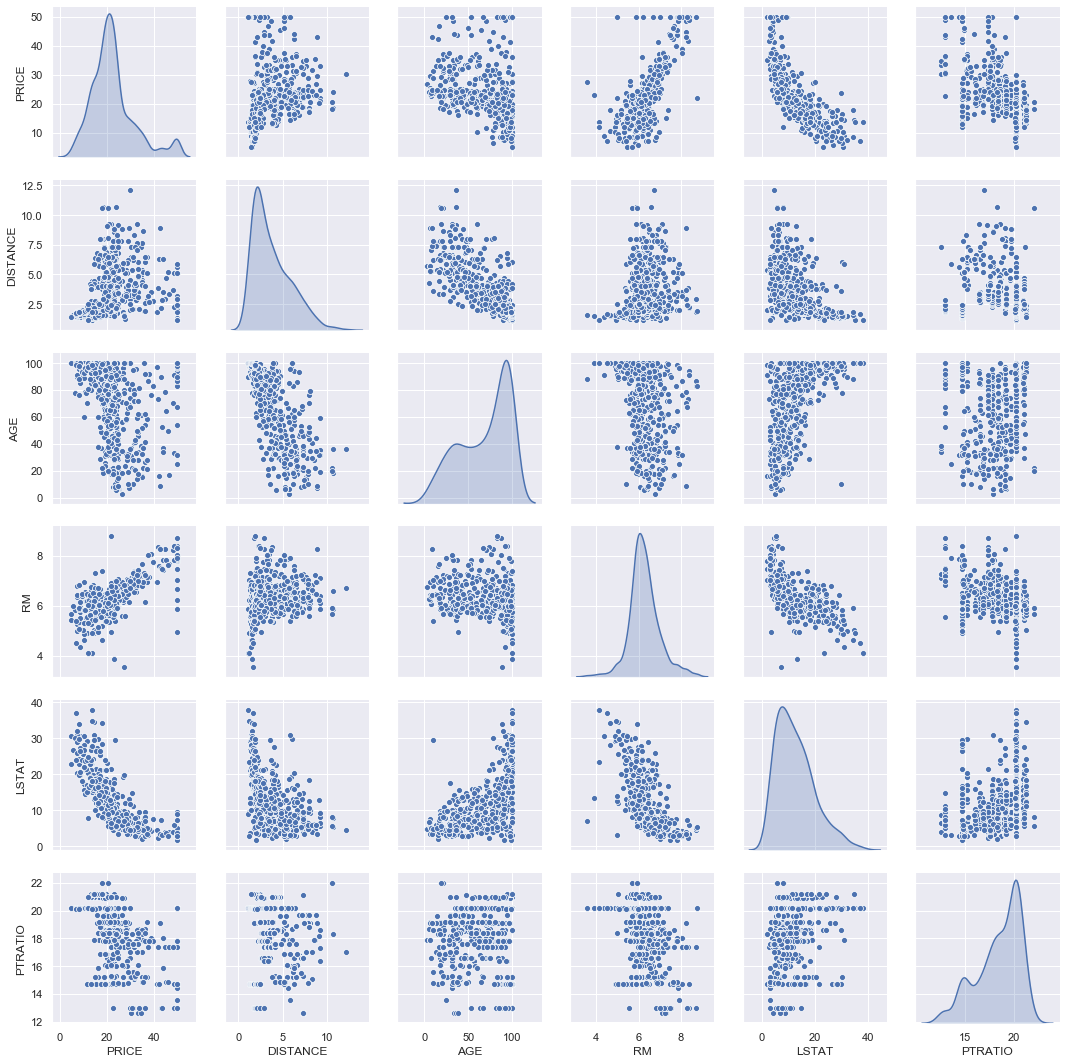

In [9]:
# Use a pairplot to visualise the relationship between variables
df = pd.DataFrame(data={'PRICE': data.PRICE,'DISTANCE':data.DIS, 'AGE': data.AGE, 'RM': data.RM, 'LSTAT': data.LSTAT, 'PTRATIO': data.PTRATIO})

# Plot pairplot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, diag_kind="kde")
plt.show()

Using the above data, we will select a number of different attributes and plot their relationship. For example, AGE is the proportion of owner-occupied units built prior to 1940 while 'RM' is average rooms per dwelling. The majority of properties are built were over 80 years old with the average above six rooms per dwelling. From the plot show that the pupil teacher ratio vs % lower status of the population. This is distributed evenly, and lower-class population have relatively similar pupil teacher ratio as higher class. Like the RM variable, plot shows that the number of pupil vs teacher ratio increases the price of the property.

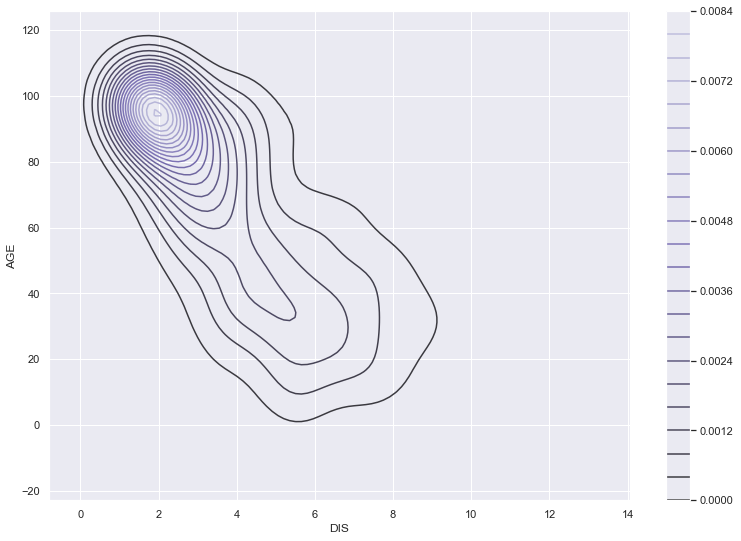

In [10]:
# visualize the probability distribution of Distance and Age 
sns.kdeplot(data["DIS"], data["AGE"],n_levels=20, cmap="Purples_d", shade=False, cbar= "True")

This plot shows that dwellings closet to the city centre are the oldest. This would be a correct presumption as the city would be built have the centre outwards as in any city.

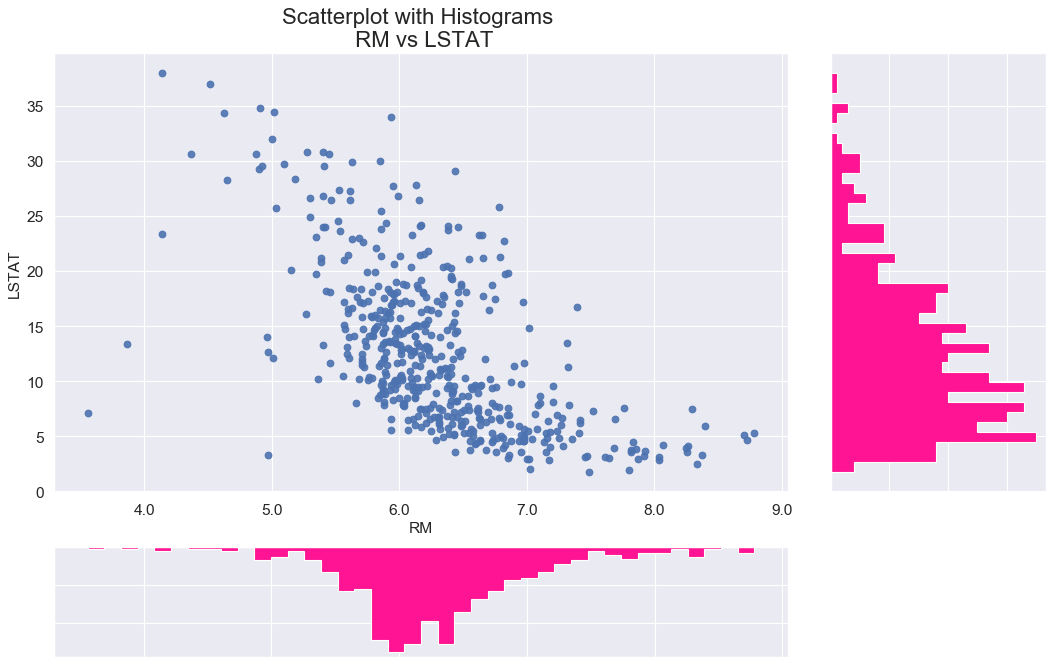

In [11]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])


# Scatterplot on main ax
ax_main.scatter('RM', 'LSTAT', alpha=.9, data=data)

# histogram on the right
ax_bottom.hist(data.RM, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(data.LSTAT, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n RM vs LSTAT', xlabel='RM', ylabel='LSTAT')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

LSTAT is negatively skewed while RM has a normal distribution as stated earlier but from the scatter plot we can see their relationship. The percentage of lower class workers have smaller properties. 

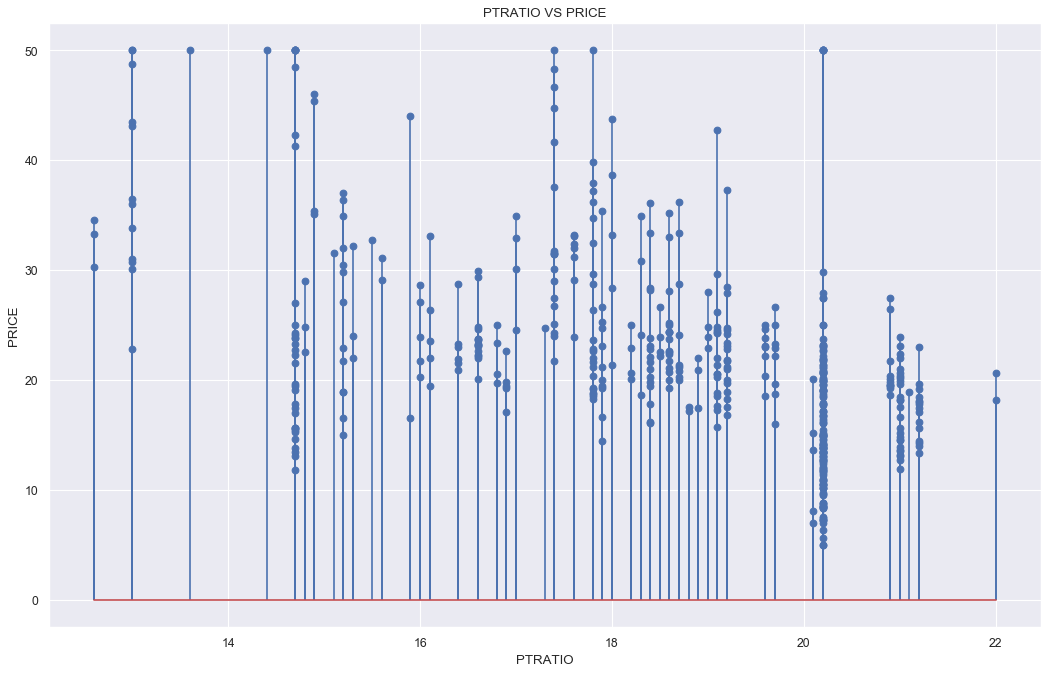

In [12]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)

# Use a stem plot
plt.stem(data.PTRATIO, data.PRICE, use_line_collection=True)
                        
#Title
plt.title("PTRATIO VS PRICE")       

# X -axis description
plt.xlabel("PTRATIO")
plt.ylabel("PRICE")

plt.show()

Our stem plot shows the price of house are relatively evenly spread along the graph. This indicates public teacher ratio does not have an impact of the price of properties.

## 2. Inferential Statistics

Statistical inference is the process of using data analysis to deduce properties of an underlying probability distribution [6]. Inferential statistical analysis for example will test if there are signiﬁcant diﬀerences in median house prices between houses that are along the Charles river and those that aren’t deriving estimates.

But first, we will create a correlation matrix. A correlation matrix is a table showing correlation coefficients between all variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data using the seaborn library [7]. The correlation coefficient ranges from -1 to 1. If the value is close to 1, this indicates there is a strong relationship between these two variables and the opposite can be said about if the value is closer to - 1. 

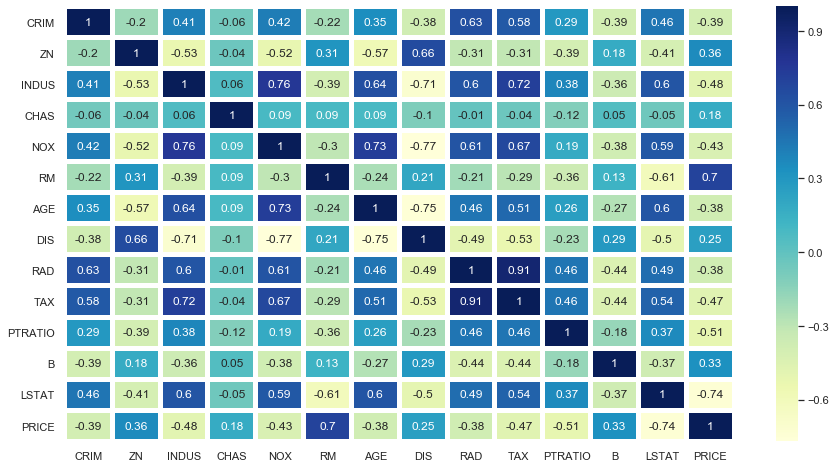

In [13]:
# Re-size the matrix
sns.set(rc={'figure.figsize':(15,8)})

# create a matrix to show the interaction between variables. Round data to 2 deciaml places
correlation_matrix = data.corr().round(2)

# Use annot to input data into square wtth color "YlGnBu"
sns.heatmap(data=correlation_matrix, linewidths=4, annot=True, cmap="YlGnBu")

Let's began by analysis the correlation matrix. The correlation between CHAS and price is 0.18. This is relatively neutral meaning properties near/far the Charles river does not have an impact on price of the property.  

We can also see from the correlation matrix, the number of rooms per dwelling 'RM' has the biggest positive impact on the price of a house at 0.70. This indicates that the number of rooms per dwelling has a positive impact on the price of the property. For example, if the property has 8 rooms vs 2 rooms then the price is likely to be higher.

Other's that have a similar impact on price like 'RM' include 'ZN' (proportion of residential land zoned for lots over 25,000 sq. Ft.) at 0.37, and 'B' (1000(Bk - 0.63) ^2 where Bk is the proportion of blacks by town) at 0.33.

The opposite can be said in relation to 'LSTAT' (LSTAT - % lower status of the population) at -0.74 and ‘PTRATIO' at -0.51. This indicates that where there is more lower-class families and pupil teacher ratios this reduces the price of property.


Next create a t-test and see if a property located near the river Charles have an impact on the price 

#### T-Tests

We will use T-Tests to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. The test works by checking the means from two samples to see if they are significantly different from each other. It does this by calculating the standard error in the difference between means, which can be interpreted to see how likely the difference is, if the two samples have the same mean (the null hypothesis) [8].

We can interpret the statistic value, by retrieve the cumulative probability of observing the absolute value of the t-statistic using the cumulative distribution function (CDF) of the t-distribution in order to calculate a p-value. The p-value can then be compared to a chosen significance level (alpha) such as 0.05 to determine if the null hypothesis can be rejected:

The null hypothesis for the independent t-test is that the population means from the two unrelated groups are equal: $$H0: u1 = u2$$
In most cases, we are looking to see if we can show that we can reject the null hypothesis and accept the alternative hypothesis, which is that the population means are not equal [16}:

$$HA: u1 ≠ u2$$ 

We are going to use the independent samples; the case where two samples are unrelated to test our theory. We begin by splitting the dataset for the price of  'CHAS' between  near and far from the Charles river.

In [14]:
# Extract data for mean price near Charles river (NCR) and far from Charles River (NOCR)
NCR = data[data['CHAS'] == 1]['PRICE']
NOCR = data[data['CHAS'] == 0]['PRICE']

# Calculate the mean price for near the Charles river
NCR.mean()
print("The mean price of property located near the Charles River:",NCR.mean())

The mean price of property located near the Charles River: 28.44


In [15]:
# Calculate the mean price for not near the Charles River
mean = str(round(NOCR.mean(),2))
print("The mean price of property not located near the Charles River:",mean)

The mean price of property not located near the Charles River: 22.09


As we can see from the data, the mean price of properties located near the river is higher than the properties located not near the river. There is a difference of over $6,000.

In [16]:
# Run an independent
stats.ttest_ind(NCR,NOCR)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Let use research.py.ttest() method to returned the information into a dataframe.

In [17]:
import researchpy as rp
descriptives, results = rp.ttest(NCR, NOCR)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,PRICE,35.0,28.440000,11.816643,1.997377,24.380841,32.499159
1,PRICE,471.0,22.093843,8.831362,0.406928,21.294220,22.893466
2,combined,506.0,22.532806,9.197104,0.408861,21.729528,23.336085


In [18]:
# SHow the result of the ttest
results

,Independent t-test,results
0,Difference (PRICE - PRICE) =,6.3462
1,Degrees of freedom =,504.0000
2,t =,3.9964
3,Two side test p value =,0.0001
4,Difference > 0 p value =,1.0000
5,Difference < 0 p value =,0.0000
6,Cohen's d =,0.7002
7,Hedge's g =,0.6991
8,Glass's delta =,0.5371
9,r =,0.1753


In [19]:
# Import library and run weighstats
import statsmodels.stats.weightstats as ws
ws.ttest_ind(NCR, NOCR)

(3.9964374660905095, 7.390623170519883e-05, 504.0)

Using both the independent stats.ttest and the weighted stats.ttest, our null hypothesis is testing that houses located near and far from the Charles River that both groups are statistically significantly similar. Here, the p-value is less than 0.05, this indicates strong evidence against the null hypothesis, so the null hypothesis is rejected.

Let's plot both the mean price of the properties located for both near and far from the Charles River. Show the split of the properties. 

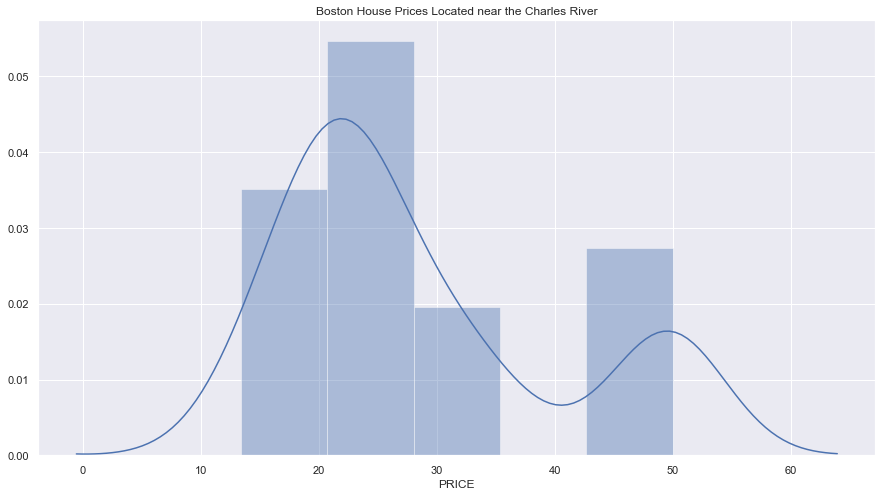

In [20]:
# Title
plt.title("Boston House Prices Located near the Charles River")       

#Print plot
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(NCR)

We can see that the majority of the houses located near the Charles River is over $20k. We must take into consideration that our sample sides is small with only 35 properties located near the river compared with 471 not located near the river.

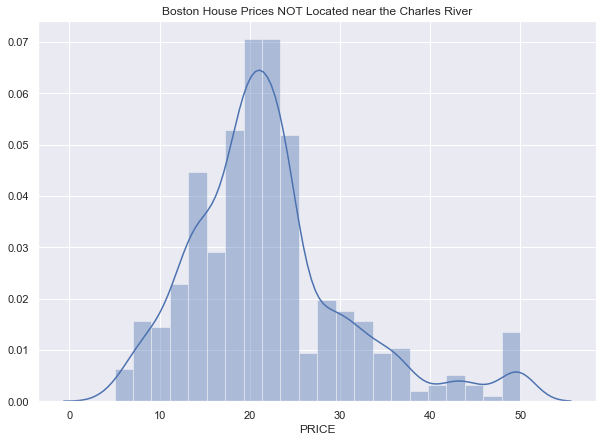

In [21]:
# Title
plt.title("Boston House Prices NOT Located near the Charles River")       

#Print plot
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(NOCR)

We can see that the houses not located near the Charles River are spread evenly between \\$15k and $25k like our full dataset. Let's show linear regression for a positive and negative impact on price. 

In statistics, linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable ('RM', 'LSTAT'), and the other is considered to be a dependent ('Price') variable [4]. A dependent variable is a particular quantity that we ask a question about in our study. An explanatory variable is any factor that can influence the dependent variable. While there can be many explanatory variables, we will primarily concern ourselves with a single explanatory variable [5].A scatterplot can be a helpful tool in determining the strength of the relationship between two variables.[4]

Before attempting to fit linear regression line to observed data, we must first determine whether or not there is a relationship between the variables of interest [4]. We will use a one variable that has a positive and negative impact on price i.e. 'RM' and 'LSTAT'. A regression line is simply a single line that best fits the data (in terms of having the smallest overall distance from the line to the points). Statisticians call this technique for finding the best-fitting line a simple linear regression analysis using the least squares method [5].


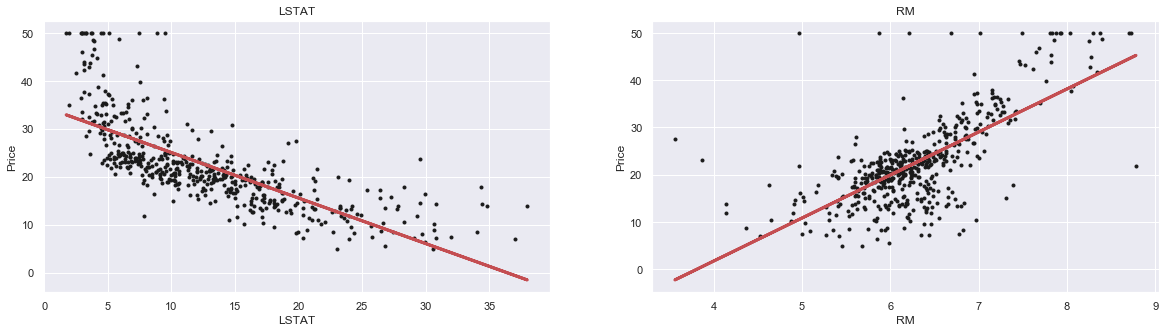

In [22]:
# Size the plot 
plt.figure(figsize=(20, 5))

# Plot for explanatory and dependent variables
explanatory = ['LSTAT', 'RM']
dependent = data['PRICE']


# Loop over explanatory variables 
for i, col in enumerate(explanatory):
    plt.subplot(1, len(explanatory) , i+1)
    x = data[col]
    y = dependent
    
    # Do regression on the x and y arrays using numpy where c is constant and m is slope
    m, c = np.polyfit(x, y, 1)
    
    # Plot x and y and the regression line in red 
    plt.plot(x, y, 'k.')
    plt.plot(x, m * x + c, 'r-', linewidth=3)
    
    
    # Title and x and y names
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')  

From the plots, we can see that the prices tend to decrease with more lower-class workers (LSTAT - % lower status of the population) as lower-class workers would have less money to spend on a home. While prices tend to rise with the increase in rooms in each dwelling (RM) as the more rooms in a house would increase the square footage making larger than one's with less rooms. The same can be said about tax income, if people earn less money it is likely that their home are worth less.
We created a regression line in our scatterplot which is simply a single line that best fits the data (in terms of having the smallest overall distance from the line to the points). The formula for the best-fitting line (or regression line) is
$$ y = mx+c $$
, where m is the slope of the line and c is the y-intercept [5].



## 3. Neural Network

The final requirement of this project is to create a neural network that can predict the median house price based on the other variables in the dataset. Neural networks are a set of algorithms, modelled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labelling or clustering raw input [9].

Neural networks help us cluster and classify. You can think of them as a clustering and classification layer on top of the data you store and manage. They help to group unlabelled data according to similarities among the example inputs, and they classify data when they have a labelled dataset to train on [9]

Neural Networks consist of the following components:
    1. An input layer, 
    2. An arbitrary amount of hidden layers
    3. An output layer, 
    4. A set of weights and biases between each layer
    5. A choice of activation function for each hidden layer [10].
    
The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal [17].
    
The below diagram is an example of 2-layer neural network.

<img src="https://upload.wikimedia.org/wikipedia/commons/9/99/Neural_network_example.svg" style="width: 250px;"/>

A final machine learning model is a model that you use to make predictions on new data but before you can make predictions, you must train a final model. Creating a train and test split of your dataset is one method to quickly evaluate the performance of an algorithm on your problem.

The training dataset is used to prepare a model, to train it. We pretend the test dataset is new data where the output values are withheld from the algorithm. We gather predictions from the trained model on the inputs from the test dataset and compare them to the withheld output values of the test set.

Comparing the predictions and withheld outputs on the test dataset allows us to compute a performance measure for the model on the test dataset. This is an estimate of the skill of the algorithm trained on the problem when making predictions on unseen data [11]. To split the data, we use train_test_split function provided by scikit-learn library.

We are going to use variables with strong correlations to 'Price'. From our correlation matrix we are going to use 'RM' at 0.70 and 'ZN' at 0.36 both have a positive impact on price while 'LSTAT' at -0.74 and 'PTRATIO' at -0.51 both have negative impact on price. I will be setting the test size at 30%.

In [188]:
# Correlation
data[['PRICE','RM','ZN','LSTAT', 'PTRATIO']].corr().round(2)

,PRICE,RM,ZN,LSTAT,PTRATIO
PRICE,1.00,0.70,0.36,-0.74,-0.51
RM,0.70,1.00,0.31,-0.61,-0.36
ZN,0.36,0.31,1.00,-0.41,-0.39
LSTAT,-0.74,-0.61,-0.41,1.00,0.37
PTRATIO,-0.51,-0.36,-0.39,0.37,1.00


It would be problematic to feed into a neural network values that all take wildly different ranges. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in python using the scale() function [12].

In [189]:
# Generate two variables
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['PTRATIO'], data['ZN']], columns = ['LSTAT','RM', 'PTRATIO', 'ZN'])
Y = data['PRICE']

# Standardise the X value using scaler
scaler = preprocessing.MinMaxScaler()
scaled_X = scaler.fit_transform(X)

# Split dataset into train and test. Test portion 30% test size
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = 0.30)
print("X Train :",X_train.shape)
print("X Test  :",X_test.shape)
print("Y Train :",Y_train.shape)
print("X Test  :",Y_test.shape)

X Train : (354, 4)
X Test  : (152, 4)
Y Train : (354,)
X Test  : (152,)


#### Test 1

The next step is to build our model. We create a Sequential model and add layers one at a time until we are happy with our network architecture. The first thing to get right is to ensure the input layer has the right number of input features [13].

In this case, we have 4 inputs; 'LSTAT', 'RM', 'PTRATIO' & 'ZN'. With regards to the correct number of layers and activation this is a difficult question to answer. The only way to figure this out is by trial and error. In this test, we have 3 layers one input, one hidden layer and one output with 12 neurons, activation types relu and sigmoid.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset. We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training [13].

In this case, for loss we will use "mean squared error" and for optimizer we will use "adam". Mean squared error is the sum of squared distances between our target variable and predicted values [18]. Adam leverages the power of adaptive learning rates methods to find individual learning rates for each parameter [19]

In [190]:
# Build neural network
# Create a new neural network.
m = kr.models.Sequential()


# Add input layer
m.add(Dense(12, input_dim=4,kernel_initializer='normal', activation='relu'))

# One one hidden layer
m.add(Dense(12,kernel_initializer='normal', activation='relu'))

# Add output
m.add(Dense(1,kernel_initializer='normal', activation='sigmoid'))

# Compile model
m.compile(optimizer='adam',loss='mean_squared_error')

history = m.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=500, batch_size=10, verbose=0)

Keras has a summary function. This includes:
1. The layers and their order in the model.
2. The output shape of each layer.
3. The number of parameters (weights) in each layer.
4. The total number of parameters (weights) in the model [14].

In [191]:
# Summary
m.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 12)                60        
_________________________________________________________________
dense_120 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 13        
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


Evaluate function computes the loss based on the input you pass it, along with any other metrics that you requested in the metrics param when you compiled your model

In [192]:
print('Test loss:', m.evaluate(X_test, Y_test, verbose=0))

Test loss: 543.8757902446546


The main objective in a learning model is to reduce (minimize) the loss function's value with respect to the model's parameters by changing the weight vector values through different optimization methods, such as backpropagation in neural networks. Loss value implies how well or poorly a certain model behaves after each iteration of optimization. Ideally, one would expect the reduction of loss after each, or several, iteration(s) [15].

In the above example, we have MSE is 543. Mean Squared Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value [20]. As we have seen in predicting the parameter X_test. This is a very poor model and we will need to try again with different parameters within our neural network. We see our MSE is over 500. But unfortunately, with this model we are seeing the model overfitting in this case we will need to enter an early stop in our next test. We can also see this below. We can also see this in our graph, how far our train and val test are apart.

dict_keys(['val_loss', 'loss'])


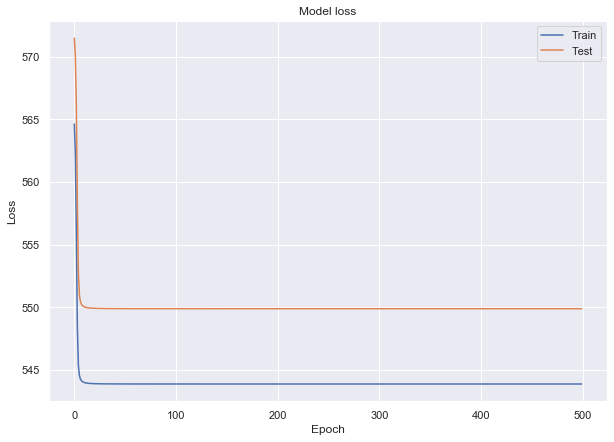

In [193]:
# list all data in history
print(history.history.keys())
# plot metrics
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#### Test 2

We will make several amendments to our training model in order to achieve better results than test 1. We are going to increase our neurons from 12 to 72, change the output activation to Softmax and increase epoch to 1000.predictions. While changing to output activation to 'Softmax' this gave us a similar result as 'Sigmoid' so we changed this to linear activation.

In [194]:
# Import library
from keras.callbacks import EarlyStopping

# Build neural network
m1 = kr.models.Sequential()

# Add layers to your model
m1.add(Dense(72, input_dim=4,kernel_initializer='normal', activation='relu'))

#Hidden layer
m1.add(Dense(72,kernel_initializer='normal', activation='relu'))

#Output
m1.add(Dense(1, activation='linear'))

# Compile the network :
m1.compile(loss='mse', optimizer='adam')

# Add an early stop
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Fit the model
history1 = m1.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=1000, batch_size=10, verbose=0, callbacks=[es])

Epoch 00024: early stopping


In [195]:
# Summary
m1.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 72)                360       
_________________________________________________________________
dense_123 (Dense)            (None, 72)                5256      
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 73        
Total params: 5,689
Trainable params: 5,689
Non-trainable params: 0
_________________________________________________________________


In [196]:
print('Test loss:', m1.evaluate(X_test, Y_test, verbose=0))

Test loss: 21.55874242280659


We have reduced our val loss from 543 to 21 by making the above adjustments. By increasing the epoch, we increase the number of times the algorithm sees the entire data set. This gives us a better size to tune our model.

Changing from sigmoid to linear, the sigmoid function as stated previously is used in a single class

dict_keys(['val_loss', 'loss'])


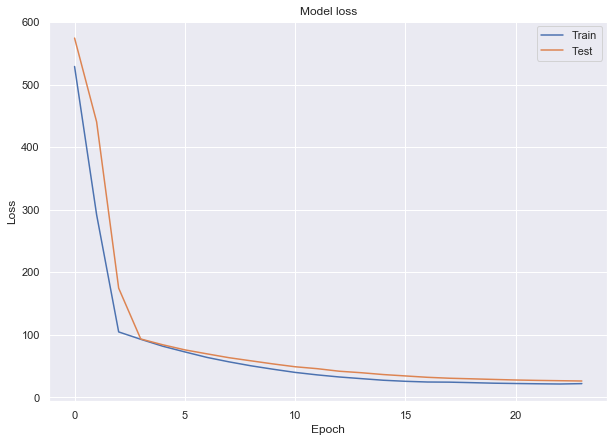

In [197]:
#Create a plot showing 
# list all data in history
print(history.history.keys())
# plot metrics
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#### Test 3

For our next test we will increase the neurons again and add an extra hidden layer, change the activation from 'Relu' to sigmoid and 'Tanh'. We will also remove the activation from the output layer.

In [198]:
# Build neural network
m2 = kr.models.Sequential()

# Add layers to your model
m2.add(Dense(128, input_dim=4,kernel_initializer='normal', activation='sigmoid'))

#Hidden layer
m2.add(Dense(64,kernel_initializer='normal', activation='tanh'))
m2.add(Dense(32,kernel_initializer='normal', activation='relu'))

#Output
m2.add(Dense(1,kernel_initializer='normal', activation='linear'))

# Compile the network :
m2.compile(loss='mean_absolute_error', optimizer='adam')

# Add an early stop
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Fit the model
history2 = m2.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=1000, batch_size=10, verbose=0, callbacks=[es])

Epoch 00005: early stopping


In [199]:
# Summary
m2.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 128)               640       
_________________________________________________________________
dense_126 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_127 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_128 (Dense)            (None, 1)                 33        
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [200]:
print('Test loss:',  m2.evaluate(X_test, Y_test, verbose=0))

Test loss: 6.8007183827851945


Making the above amendments has helped reduce our test loss to 7. Which is going in the right direction, but in this case our neural network is underfitting the model.

dict_keys(['val_loss', 'loss'])


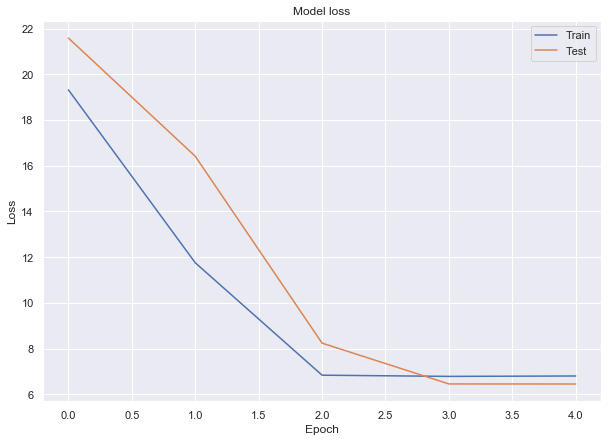

In [201]:
#Create a plot showing 
# list all data in history
print(history.history.keys())
# plot metrics
plt.plot(history2.history['val_loss'])
plt.plot(history2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#### Test 4

We are going to add an earlystop and see how this affects our model. And we will tune our model adjusting the parameters including changing the optimizer to sgd. Using the sgd made again the model was underfitting slighly so we changed back to adam as optimizer.

In [202]:
# Import library
from keras.callbacks import EarlyStopping

# Build neural network
m3 = kr.models.Sequential()

# Add layers to your model
m3.add(Dense(120, input_dim=4,kernel_initializer='normal', activation='linear'))

# Hidden layer
m3.add(Dense(120,kernel_initializer='normal', activation='relu'))

# Output
m3.add(Dense(1))

# Compile the network 
m3.compile(loss='mean_absolute_error', optimizer='adam')

# Add an early stop
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Fit the model
history3 = m3.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=1000, batch_size=10, verbose=0, callbacks=[es])

Epoch 00012: early stopping


In [203]:
print('Test loss:',  m3.evaluate(X_test, Y_test, verbose=0))

Test loss: 3.9720089561060856


dict_keys(['val_loss', 'loss'])


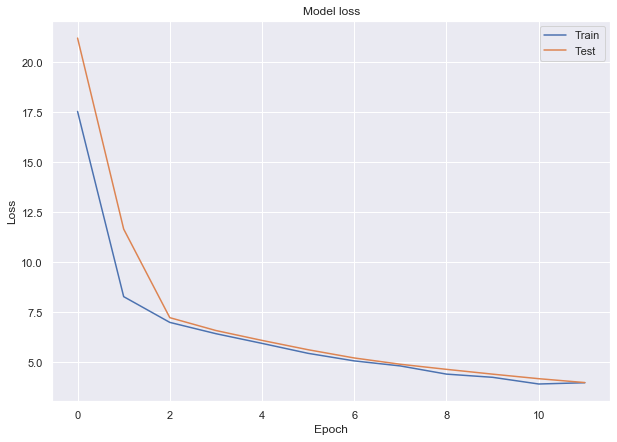

In [204]:
#Create a plot showing 
# list all data in history
print(history.history.keys())
# plot metrics
plt.plot(history3.history['val_loss'])
plt.plot(history3.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Unfortunately, after trying to add neurons and extra or changing activations a number of times without overfitting and underfitting the model, the best result I could manage was 3.97. We are going to change from scaler to whitening to normalise the data and see if this helps to better tune the results. 

#### Test 1 - Whitening

We will use the whitening technique to normalise the data instead of scaler. The goal of whitening is to make the input less redundant; more formally, our desiderata are that our learning algorithms sees a training input where (i) the features are less correlated with each other, and (ii) the features all have the same variance [22]. In order to use this whitening technique, we will need to use PCA. Principal Components Analysis (PCA) is a dimensionality reduction algorithm that can be used to significantly speed up your unsupervised feature learning algorithm [22]

In [205]:
# Import library
import sklearn.decomposition as dec

# Whitening technique
pca = dec.PCA(n_components=4, whiten=True)
pca.fit(X_test)
test_white = pd.DataFrame(pca.transform(X_test), columns=X.columns)

In [206]:
# Build neural network using Sequential
model = kr.models.Sequential()

# Add layers to your model
model.add(Dense(128, input_dim=4,kernel_initializer='normal', activation='sigmoid'))

#Hidden layer
model.add(Dense(64,kernel_initializer='normal', activation='tanh'))
model.add(Dense(32,kernel_initializer='normal', activation='relu'))

#Output
model.add(Dense(1))

# Add an early stop
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Build the graph.
model.compile(loss='mean_absolute_error', optimizer='sgd')

In [207]:
# Train the neural network.
hist = model.fit(X_train, Y_train, validation_data=(test_white,Y_test), epochs=1000, batch_size=10, verbose=1, callbacks=[es])

Train on 354 samples, validate on 152 samples
Epoch 1/1000
354/354 [==============================] - 2s 6ms/step - loss: 18.5247 - val_loss: 7.0386
Epoch 2/1000
354/354 [==============================] - 0s 397us/step - loss: 6.4976 - val_loss: 7.1374
Epoch 00002: early stopping


In [208]:
# Summary
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 128)               640       
_________________________________________________________________
dense_133 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_134 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 33        
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [209]:
print("Val loss is:", model.evaluate(test_white, Y_test))

152/152 [==============================] - 0s 229us/step
Val loss is: 7.137355879733437


In our first test we have a val loss of 7. We will try again making several adjustments in order to improve our tuning of the neural network. This show signs of overfitting the model. [22]

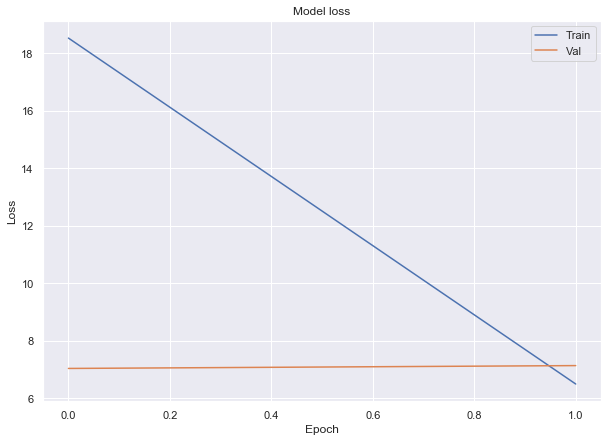

In [221]:
#Create a plot showing 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Test 2 - Whitening

In [211]:
# Build neural network using Sequential
model1 = kr.models.Sequential()

# Add layers to your model
model1.add(Dense(12, input_dim=4,kernel_initializer='normal', activation='linear'))

#Hidden layer
model1.add(Dense(12,kernel_initializer='normal', activation='tanh'))
model1.add(Dense(32,kernel_initializer='normal', activation='relu'))

#Output
model1.add(Dense(1, activation='linear'))

# Add an early stop
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Build the graph.
model1.compile(loss='mean_absolute_error', optimizer='adam')

In [212]:
# Train the neural network.
hist1 = model1.fit(X_train, Y_train, validation_data=(test_white,Y_test), epochs=1000, batch_size=10, verbose=0, callbacks=[es])

Epoch 00007: early stopping


In [213]:
# Summary
model1.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 12)                60        
_________________________________________________________________
dense_137 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_138 (Dense)            (None, 32)                416       
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 33        
Total params: 665
Trainable params: 665
Non-trainable params: 0
_________________________________________________________________


In [214]:
print("Val loss is:", model1.evaluate(test_white, Y_test))

152/152 [==============================] - 0s 105us/step
Val loss is: 13.968216594896818


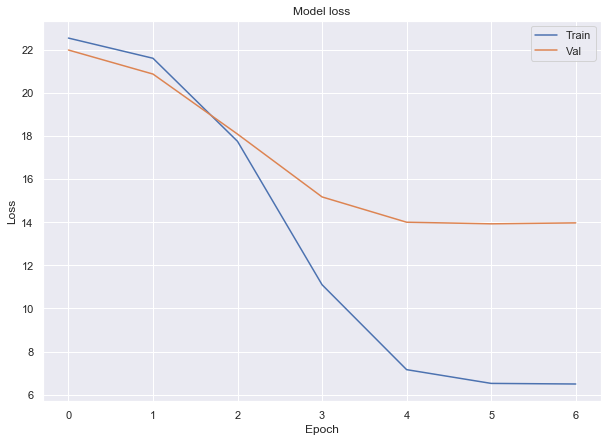

In [215]:
#Create a plot showing 
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Using the whitening technique has led to overfitting the model and has not improve on the val loss of 13 to achieve the desired outcome which is to reduce the level of error to close to zero as possible. In our next test, I will use all variables from the Boston housing dataset and see if our model can improve in level of error.

#### Test 1 - All Variables with scaler 

In [216]:
# Generate two variables
X1 = data.iloc[:,0:13]
Y1 = data['PRICE']

# Standardise the X value using scaler
scaler1 = preprocessing.MinMaxScaler()
scaled_X1 = scaler1.fit_transform(X1)

# Split dataset into train and test. Test portion 30% test size
X_train1, X_test2, Y_train1, Y_test2 = train_test_split(scaled_X1, Y1, test_size = 0.30)
print("X Train :",X_train1.shape)
print("X Test  :",X_test2.shape)
print("Y Train :",Y_train1.shape)
print("X Test  :",Y_test2.shape)

X Train : (354, 13)
X Test  : (152, 13)
Y Train : (354,)
X Test  : (152,)


In [217]:
# Build neural network
modeltot = kr.models.Sequential()

# Add layers to your model
modeltot.add(Dense(120, input_dim=13,kernel_initializer='normal', activation='linear'))

# Hidden layer
modeltot.add(Dense(12, kernel_initializer='normal', activation='linear'))
#modeltot.add(Dense(120, activation='relu'))

# Output
modeltot.add(Dense(1,kernel_initializer='normal', activation='linear'))

# Compile the network :
modeltot.compile(loss='mean_absolute_error', optimizer='adam')

# Add an early stop
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Fit the model
historytot = modeltot.fit(X_train1, Y_train1, validation_data=(X_test2,Y_test2), epochs=1000, batch_size=10, verbose=0, callbacks=[es])

Epoch 00023: early stopping


In [218]:
# Summary
modeltot.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 120)               1680      
_________________________________________________________________
dense_141 (Dense)            (None, 12)                1452      
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 13        
Total params: 3,145
Trainable params: 3,145
Non-trainable params: 0
_________________________________________________________________


In [219]:
print("Val loss is:", modeltot.evaluate(X_test2, Y_test2))

152/152 [==============================] - 0s 92us/step
Val loss is: 3.7638126674451327


Using all the features in the dataset with a MSE at 3.7 which is our best result by 0.2 vs test 4 but unlike test 4 this is slighly underfitted.

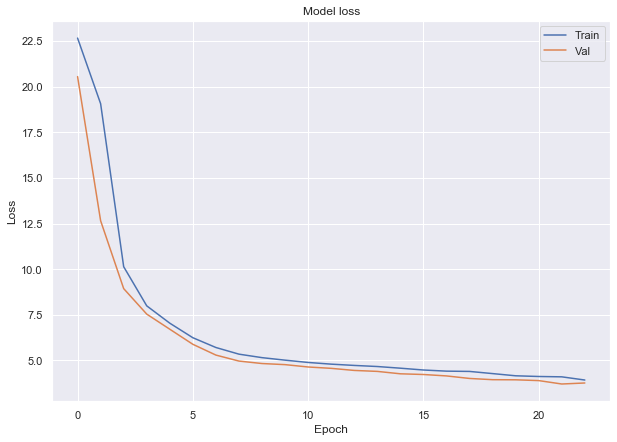

In [227]:
#Create a plot showing 
plt.plot(historytot.history['loss'])
plt.plot(historytot.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## Conclusion

This project was divided into 3 parts. We began by describing the dataset and using plots and graphs to show the features of the dataset. In order to do this, we use matplotlib and seaborn functions from the python package.

The next section we used inferential statistics to see if property closer to the River Charles were more expensive versus properties that were not. We figured out that there was a $6,000 difference but we only had less than 35 properties in our dataset. In order to predict with reasonable certainty, we would need a larger dataset. To test for this, we used the t-tests to find the difference. We also showed the relationship for variables 'LSTAT' and 'RM' against price using linear regression.

Last section was to create a neural network to predict the price of houses based on the other variables in the dataset, By
changing our model from the variables that have the positive/negative correlation to all the variables there is not a major impact on the validation of loss. The best result I could manage after tuning my neural network is 3.8. which is slightly underfitting. During our journey of building our neural network, we tuned our model by trail and test different models by adding neurons and layers, changing activations and optimizers, increasing/decreasing the epoch and finally changing X value to all variables.  

The best test is test 4 at under 3.9 and test 1 with all the variables again under 3.8. This was after using the earlystop. There is no way of knowing the how to reduce the validation loss is by trail and error.   



### References

1. https://en.wikipedia.org/wiki/Descriptive_statistics

2. https://keydifferences.com/differences-between-skewness-and-kurtosis.html

3. https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

4. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

5. https://www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/

6. https://en.wikipedia.org/wiki/Statistical_inference

7. https://www.displayr.com/what-is-a-correlation-matrix/

8. https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

9. https://skymind.ai/wiki/neural-network

10. https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

11. https://machinelearningmastery.com/train-final-machine-learning-model/

12. https://jjallaire.github.io/deep-learning-with-r-notebooks/notebooks/3.6-predicting-house-prices.nb.html

13. https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

14. https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/

 15. https://stackoverflow.com/questions/34518656/how-to-interpret-loss-and-accuracy-for-a-machine-learning-model

16. https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

17. https://www.investopedia.com/terms/n/neuralnetwork.asp

18. https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

19. https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

20. https://en.wikipedia.org/wiki/Mean_squared_error

21. https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

22. http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/